In [30]:
import pandas as pd

In [31]:
df=pd.read_csv("banklimpio.csv")
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_unknown',
       'y_yes'],
      dtype='object')

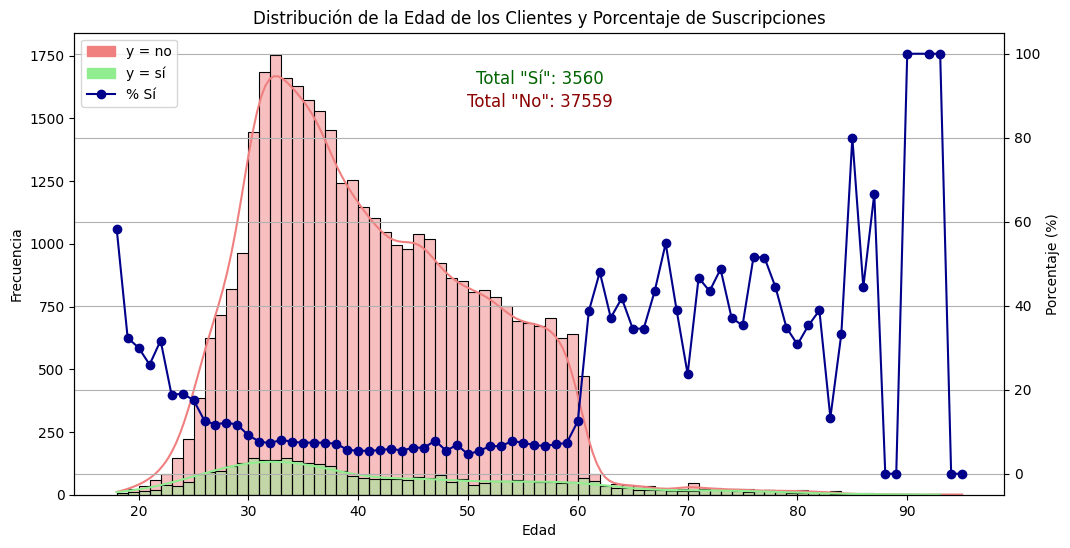

In [32]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los límites de los bins para que cada bin represente un año
age_bins = range(df['age'].min(), df['age'].max() + 1)

plt.figure(figsize=(12, 6))
# Histograma para 'y = no'
sns.histplot(df[df['y_yes'] == 0]['age'], bins=age_bins, color='lightcoral', edgecolor='black', kde=True)
# Histograma para 'y = sí'
sns.histplot(df[df['y_yes'] == 1]['age'], bins=age_bins, color='lightgreen', edgecolor='black', kde=True)

plt.xlabel('Edad')
plt.ylabel("Frecuencia")
plt.title('Distribución de la Edad de los Clientes y Porcentaje de Suscripciones')


# Calcular el porcentaje de "sí" para cada edad
age_counts = df.groupby('age')['y_yes'].agg(['sum', 'count'])
age_counts['percentage_yes'] = (age_counts['sum'] / age_counts['count']) * 100

# Añadir una línea para el porcentaje de "sí" sobre los histogramas
second_axis = plt.gca().twinx()  # Crear un segundo eje y
second_axis.plot(age_counts.index, age_counts['percentage_yes'], color='darkblue', marker='o', linestyle='-')
second_axis.set_ylabel('Porcentaje (%)')  # Etiqueta del eje derecho como "Porcentaje"


# Crear manejadores personalizados para las leyendas
legend_y_no = mpatches.Patch(color='lightcoral', label='y = no')
legend_y_yes = mpatches.Patch(color='lightgreen', label='y = sí')
legend_percentage = mlines.Line2D([], [], color='darkblue', marker='o', linestyle='-', label='% Sí')

# Colocar la leyenda personalizada en la esquina superior izquierda
plt.legend(handles=[legend_y_no, legend_y_yes, legend_percentage], loc='upper left')

total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes
plt.text(0.5, 0.90, f'Total "Sí": {total_yes}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkgreen')
plt.text(0.5, 0.85, f'Total "No": {total_no}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkred')

# Ajustes finales
plt.grid(True)  # Activar cuadrícula
plt.show()






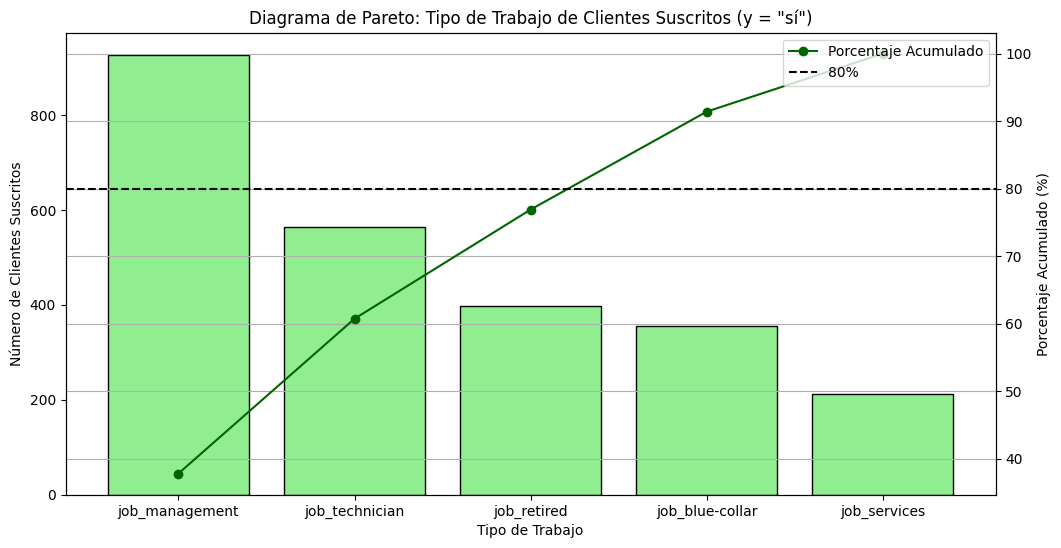

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 1].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightgreen', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes Suscritos (y = "sí")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkgreen', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


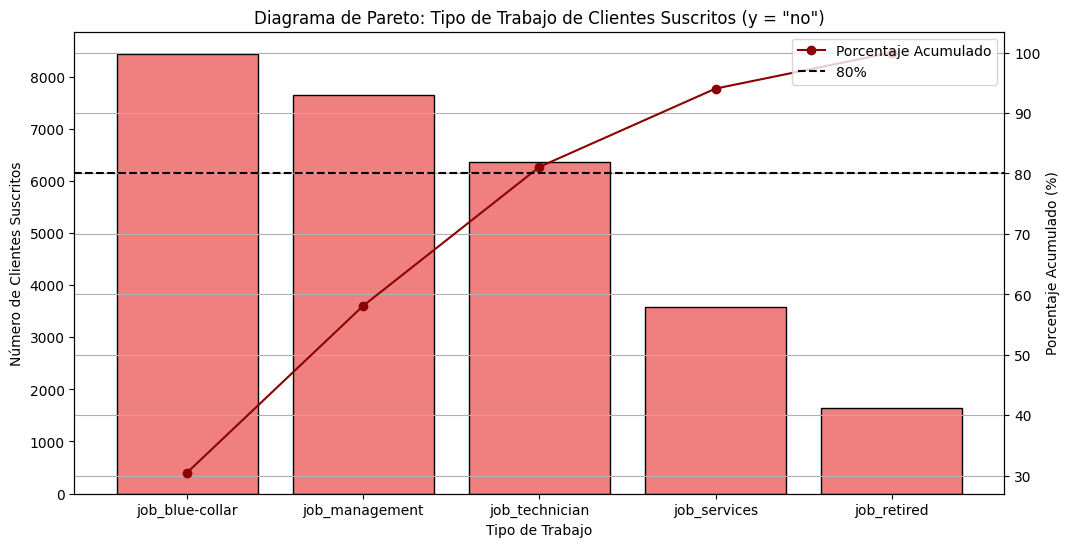

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 0].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightcoral', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes Suscritos (y = "no")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkred', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


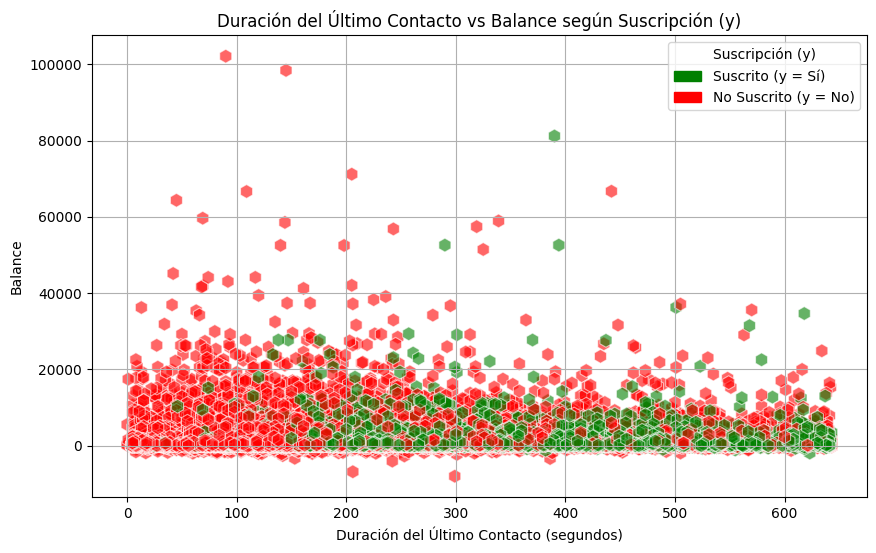

In [35]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generar un gráfico de dispersión que muestre duración, balance y la variable de suscripción (y)
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión usando seaborn
scatter = sns.scatterplot(data=df, x='duration', y='balance', hue='y_yes', 
                          palette={1: 'green', 0: 'red'}, alpha=0.6, s=100, marker="h")

# Ajustes de etiquetas y título
plt.xlabel("Duración del Último Contacto (segundos)")
plt.ylabel("Balance")
plt.title("Duración del Último Contacto vs Balance según Suscripción (y)")

# Añadir leyenda personalizada
handles = [mpatches.Patch(color='green', label='Suscrito (y = Sí)'), 
           mpatches.Patch(color='red', label='No Suscrito (y = No)')]
plt.legend(handles=handles, title="Suscripción (y)", loc='upper right')

plt.grid(True)  # Activar cuadrícula
plt.show()


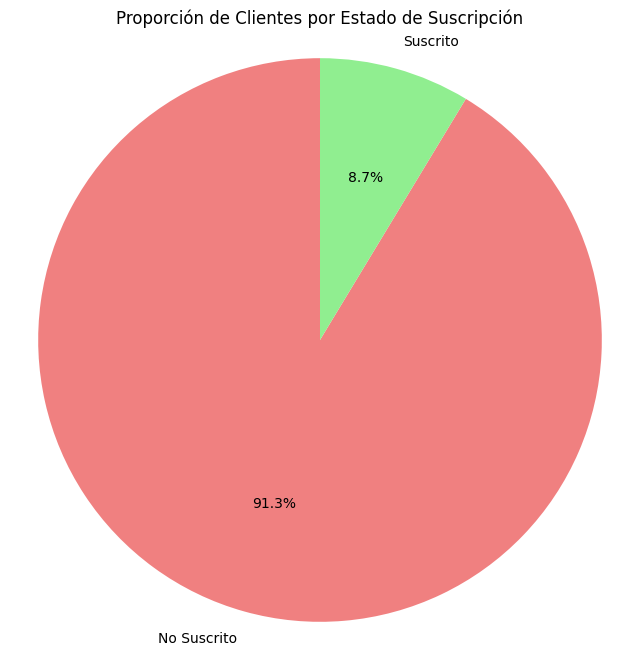

In [36]:
# Calcular el total de "Sí" y "No"
total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes

# Generar solo el pie chart con colores claros
plt.figure(figsize=(8, 8))

# Pie chart para mostrar la proporción de suscriptores y no suscriptores
sizes = [total_no, total_yes]
labels = ['No Suscrito', 'Suscrito']
colors = ['lightcoral', 'lightgreen']  # Colores claros
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proporción de Clientes por Estado de Suscripción")

plt.show()


C:\Users\srodr\AppData\Local\Temp\ipykernel_31972\697335248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")


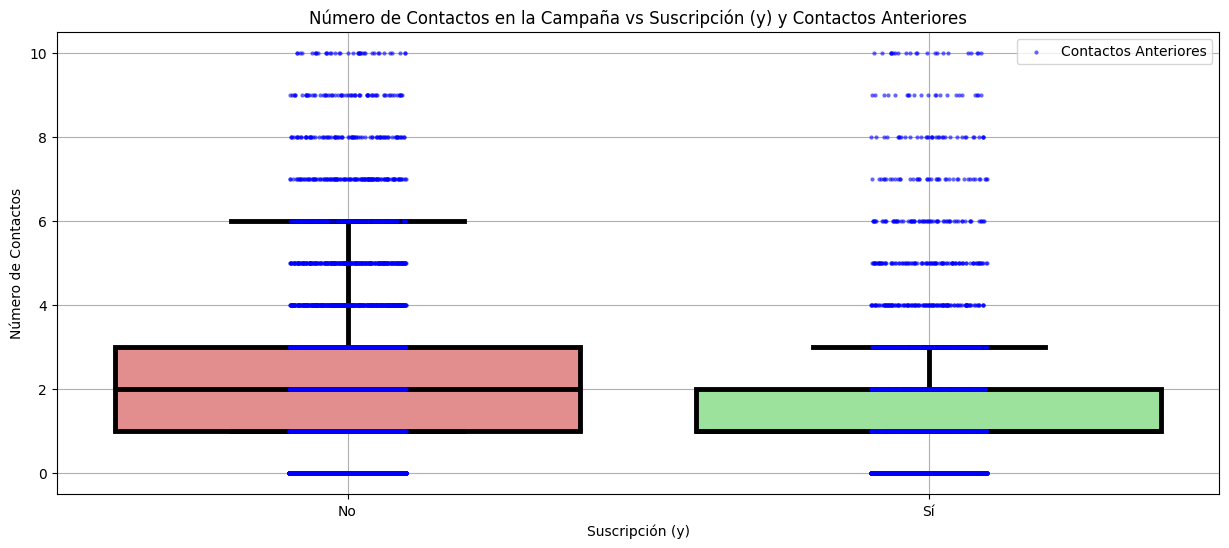

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Asegurarnos de que los valores de y_yes sean tratados como cadenas
df['y_yes'] = df['y_yes'].astype(str)

# Crear un gráfico que combine los datos de 'campaign' y 'previous'
plt.figure(figsize=(15, 6))




# Gráfico de puntos para el número de contactos en campañas anteriores
sns.stripplot(x='y_yes', y='previous', data=df, color='blue', alpha=0.6, jitter=True, marker='o', size=3, label='Contactos Anteriores')
plt.legend(loc='upper right', labels=["Contactos Anteriores"])

# Boxplot para el número de contactos en la campaña actual con colores claros
sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")

# Ajustes de etiquetas y título
plt.xlabel("Suscripción (y)")
plt.ylabel("Número de Contactos")
plt.title("Número de Contactos en la Campaña vs Suscripción (y) y Contactos Anteriores")

# Añadir leyenda para los contactos anteriores


plt.grid(True)  # Activar cuadrícula
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar los ticks del eje x
plt.show()



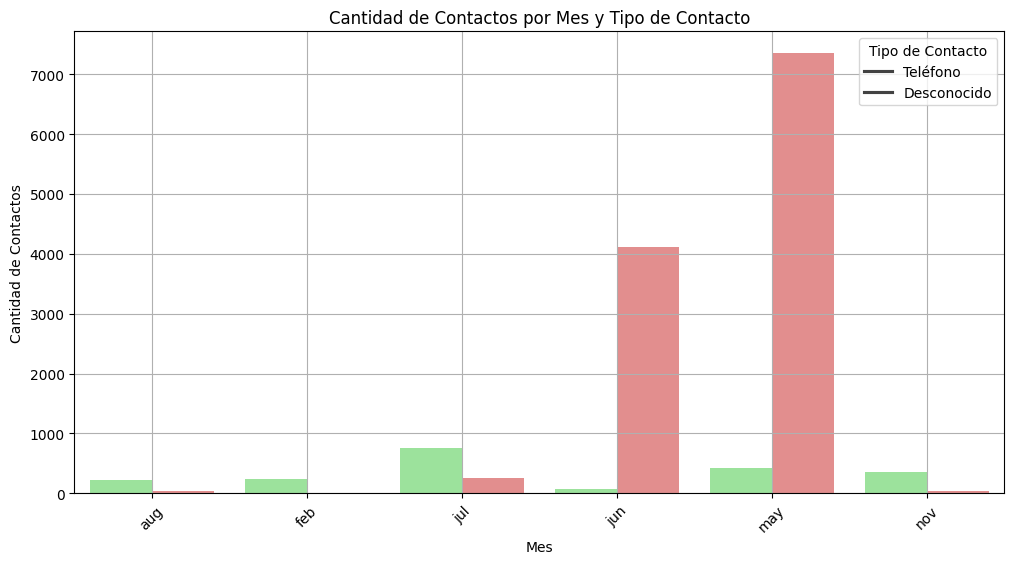

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Definir las columnas de meses
months = ['month_aug', 'month_feb', 'month_jul', 'month_jun', 
          'month_may', 'month_nov']

# Crear un nuevo DataFrame para contar los contactos por mes y tipo de contacto
contact_counts = []

for month in months:
    for contact_type in ['contact_telephone', 'contact_unknown']:
        count = df[(df[month] == 1) & (df[contact_type] == 1)].shape[0]
        contact_counts.append({'month': month.split('_')[1], 'contact': contact_type.split('_')[1], 'count': count})

# Convertir a DataFrame
contact_counts_df = pd.DataFrame(contact_counts)

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=contact_counts_df, x='month', y='count', hue='contact', palette={'telephone': 'lightgreen', 'unknown': 'lightcoral'})
plt.xlabel("Mes")
plt.ylabel("Cantidad de Contactos")
plt.title("Cantidad de Contactos por Mes y Tipo de Contacto")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend(title="Tipo de Contacto", labels=["Teléfono", "Desconocido"])

plt.grid(True)  # Activar cuadrícula
plt.show()


